# Praca Domowa 5 - Wstęp do uczenia maszynowego
## Kinga Ułasik IiAD 18.05.2021

# Potrzebne importy

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych

In [2]:
df_org = pd.read_csv('clustering.csv', header=None, names=['dimension1', 'dimension2'])
df_org.head()

,dimension1,dimension2
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


# Pierwszy rzut oka

In [114]:
print(f"Number of missing values: {df_org.isnull().sum().sum()}")

Number of missing values: 0


In [113]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dimension1  400 non-null    float64
 1   dimension2  400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [19]:
df_org.describe()

,dimension1,dimension2
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


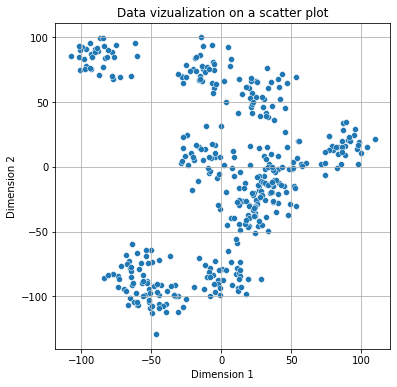

In [32]:
plt.figure(figsize =(6, 6))
sns.scatterplot(data = df_org, x = 'dimension1', y = "dimension2")
plt.title("Data vizualization on a scatter plot")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

Nawet już z samego prostego scatter plota widać parę wyróżniających się klastrów

# Klasteryzacja - K means

## Przykładowa klasteryzacja dla 7miu klastrów

In [3]:
from sklearn.cluster import KMeans
def doKmeans(X, nclust=5):
    model = KMeans(n_clusters=nclust, n_init=10, max_iter=300, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent, model)

In [41]:
df = df_org.copy(deep=True)
clust_labels, cent, model = doKmeans(df, 7)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

Text(0, 0.5, 'Dimension 2')

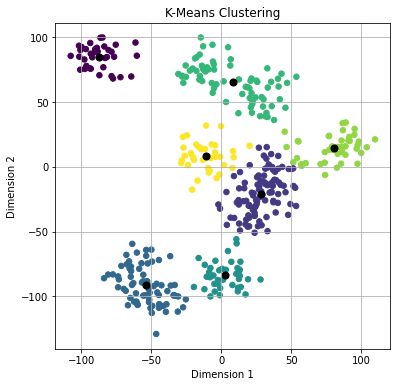

In [42]:
#kmeans = pd.DataFrame(clust_labels)
#df.insert((df.shape[1]),'kmeans',kmeans)

fig = plt.figure(figsize =(6, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['dimension1'],df['dimension2'],
                     c=kmeans[0],s=30)
plt.scatter(cent[:,0] , cent[:,1] , s = 50, color = 'black')
plt.grid()
ax.set_title('K-Means Clustering')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

## Wybieranie optymalnej ilości klastrów

Do wybrania optymalnej liczby kastrów użyjemy *metody łokcia*, czyli przedstawimy zależność SSE od ilości klastrów na wykresie i będziemy szukać *punktu przegięcia*

SSS(Error Sum of Square) - suma kwadratów różnic między każdą obserwacją a średnią jej grupy. Używany jako miara variancji w obrębie klastra.

In [25]:
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_org)
    sse.append(kmeans.inertia_)


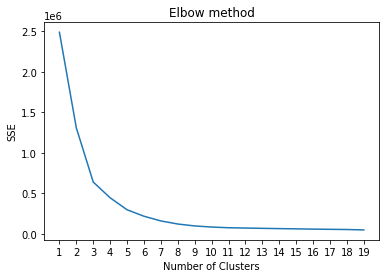

In [28]:
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Zauważmy, że punkt przegięcia znajduje się w punkcie 3 lub 5, będzie to optymalna ilość klastrów, dla pewności sprawadźmy to za pomocą funkcji

In [29]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")

kl.elbow

5

## Finalna klasteryzacja - K means

Text(0, 0.5, 'Dimension 2')

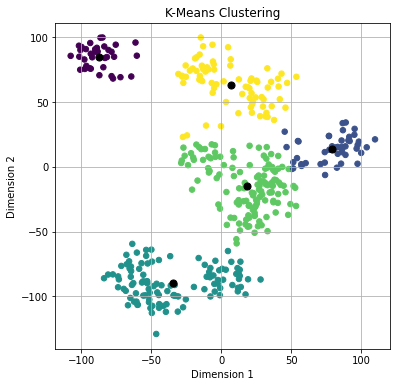

In [34]:
df = df_org.copy(deep=True)
clust_labels, cent, model = doKmeans(df, 5)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

fig = plt.figure(figsize =(6, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['dimension1'],df['dimension2'],
                     c=kmeans[0],s=30)
plt.scatter(cent[:,0] , cent[:,1] , s = 50, color = 'black')
plt.grid()
ax.set_title('K-Means Clustering')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')


# Klasteryzacja -  Aglomeracyjna klasteryzacja

## Przykładowa klasteryzacja dla 7miu klastrów

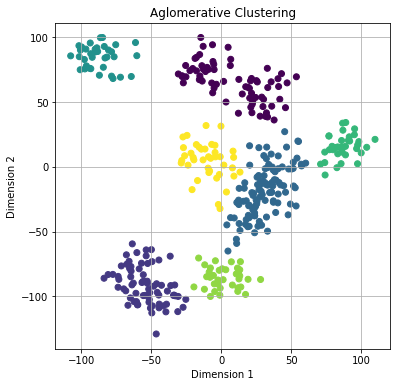

In [38]:
from sklearn.cluster import AgglomerativeClustering
df = df_org.copy(deep=True)
ac2 = AgglomerativeClustering(n_clusters = 7)

plt.figure(figsize =(6, 6))
plt.scatter(df['dimension1'], df['dimension2'], 
           c = ac2.fit_predict(df))
plt.grid()
plt.title('Aglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Wybieranie optymalnej ilości klastrów
Skorzystamy z metody analizy dendrogramu

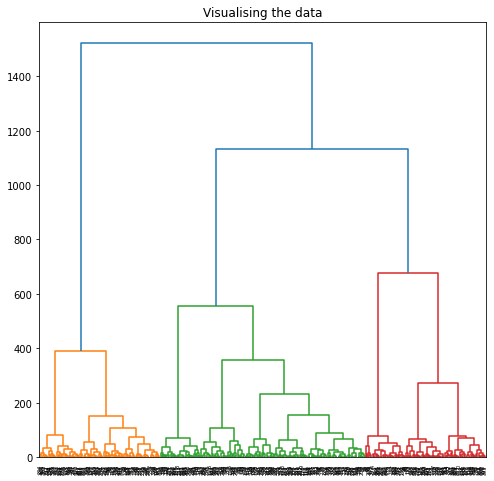

In [94]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df, method ='ward')))

Szukamy największej odległości, jaką możemy znaleźć w pionie, bez przecinania linii poziomych, a następnie 'przecinamy' wybrany obszar poziomą linią. Ilość pionowych linii które przecięliśmy w ten sposób to optymalna ilość klastrów. 

Zauważmy, że w tym przypadku ta liczba to 3

## Finalna klasteryzacja - Aglomeracyjna

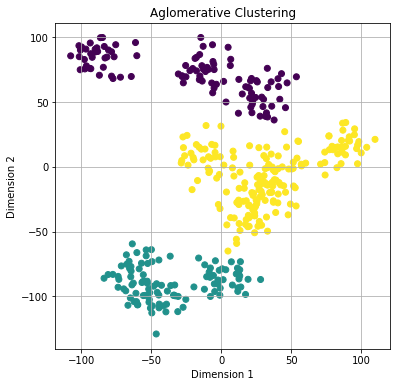

In [40]:
ac2 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(df['dimension1'], df['dimension2'], 
           c = ac2.fit_predict(df))
plt.grid()
plt.title('Aglomerative Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()